In [ ]:
import numpy as np
import pandas as pd
import requests
#from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
from albumentations import (
    Compose,
    HorizontalFlip,
    VerticalFlip,
    RandomRotate90,
    ShiftScaleRotate,
    RandomBrightnessContrast,
    Resize,
)

In [ ]:
#Unzip the downladed data.zip file
'''
import zipfile
import os

# Set the path to the zip file
zip_file_path = '/content/drive/Shareddrives/Data-255/Dataset/data.zip'

# Set the directory where you want to extract the contents
extracted_dir = '/content/drive/Shareddrives/Data-255/Dataset/data'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List all the folders and files in the extracted directory
contents = os.listdir(extracted_dir)
print("Contents of the extracted directory:")
print(contents)
'''

'\nimport zipfile\nimport os\n\n# Set the path to the zip file\nzip_file_path = \'/content/drive/Shareddrives/Data-255/Dataset/data.zip\'\n\n# Set the directory where you want to extract the contents\nextracted_dir = \'/content/drive/Shareddrives/Data-255/Dataset/data\'\n\n# Extract the contents of the zip file\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extracted_dir)\n\n# List all the folders and files in the extracted directory\ncontents = os.listdir(extracted_dir)\nprint("Contents of the extracted directory:")\nprint(contents)\n'

In [ ]:
#Unzip the downladed data.zip file
'''
import zipfile
import os

# Set the path to the zip file
zip_file_path = '/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels.zip'

# Set the directory where you want to extract the contents
extracted_dir = '/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List all the folders and files in the extracted directory
contents = os.listdir(extracted_dir)
print("Contents of the extracted directory:")
print(contents)
'''

'\nimport zipfile\nimport os\n\n# Set the path to the zip file\nzip_file_path = \'/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels.zip\'\n\n# Set the directory where you want to extract the contents\nextracted_dir = \'/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels\'\n\n# Extract the contents of the zip file\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extracted_dir)\n\n# List all the folders and files in the extracted directory\ncontents = os.listdir(extracted_dir)\nprint("Contents of the extracted directory:")\nprint(contents)\n'

In [ ]:
# File path to the Data Entry of the patients file
file_path_patients = 'Data_Entry_2017.csv'
# File path to the Data Entry of the disease classification
file_path_seg = 'BBox_List_2017.csv'

**Data Discovery and Analysis**

In [ ]:
# reading the patients' diagnosis information
df_patient = pd.read_csv(file_path_patients, usecols=['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender','View Position','OriginalImage[Width','Height]','OriginalImagePixelSpacing[x','y]'])
df_patient.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [ ]:
print('Shape of the data : ',df_patient.shape)

Shape of the data :  (112120, 11)


In [ ]:
#Dataset's descriptive statistics
df_patient.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


In [ ]:
# Check for missing values
print(df_patient.isnull().sum())

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
dtype: int64


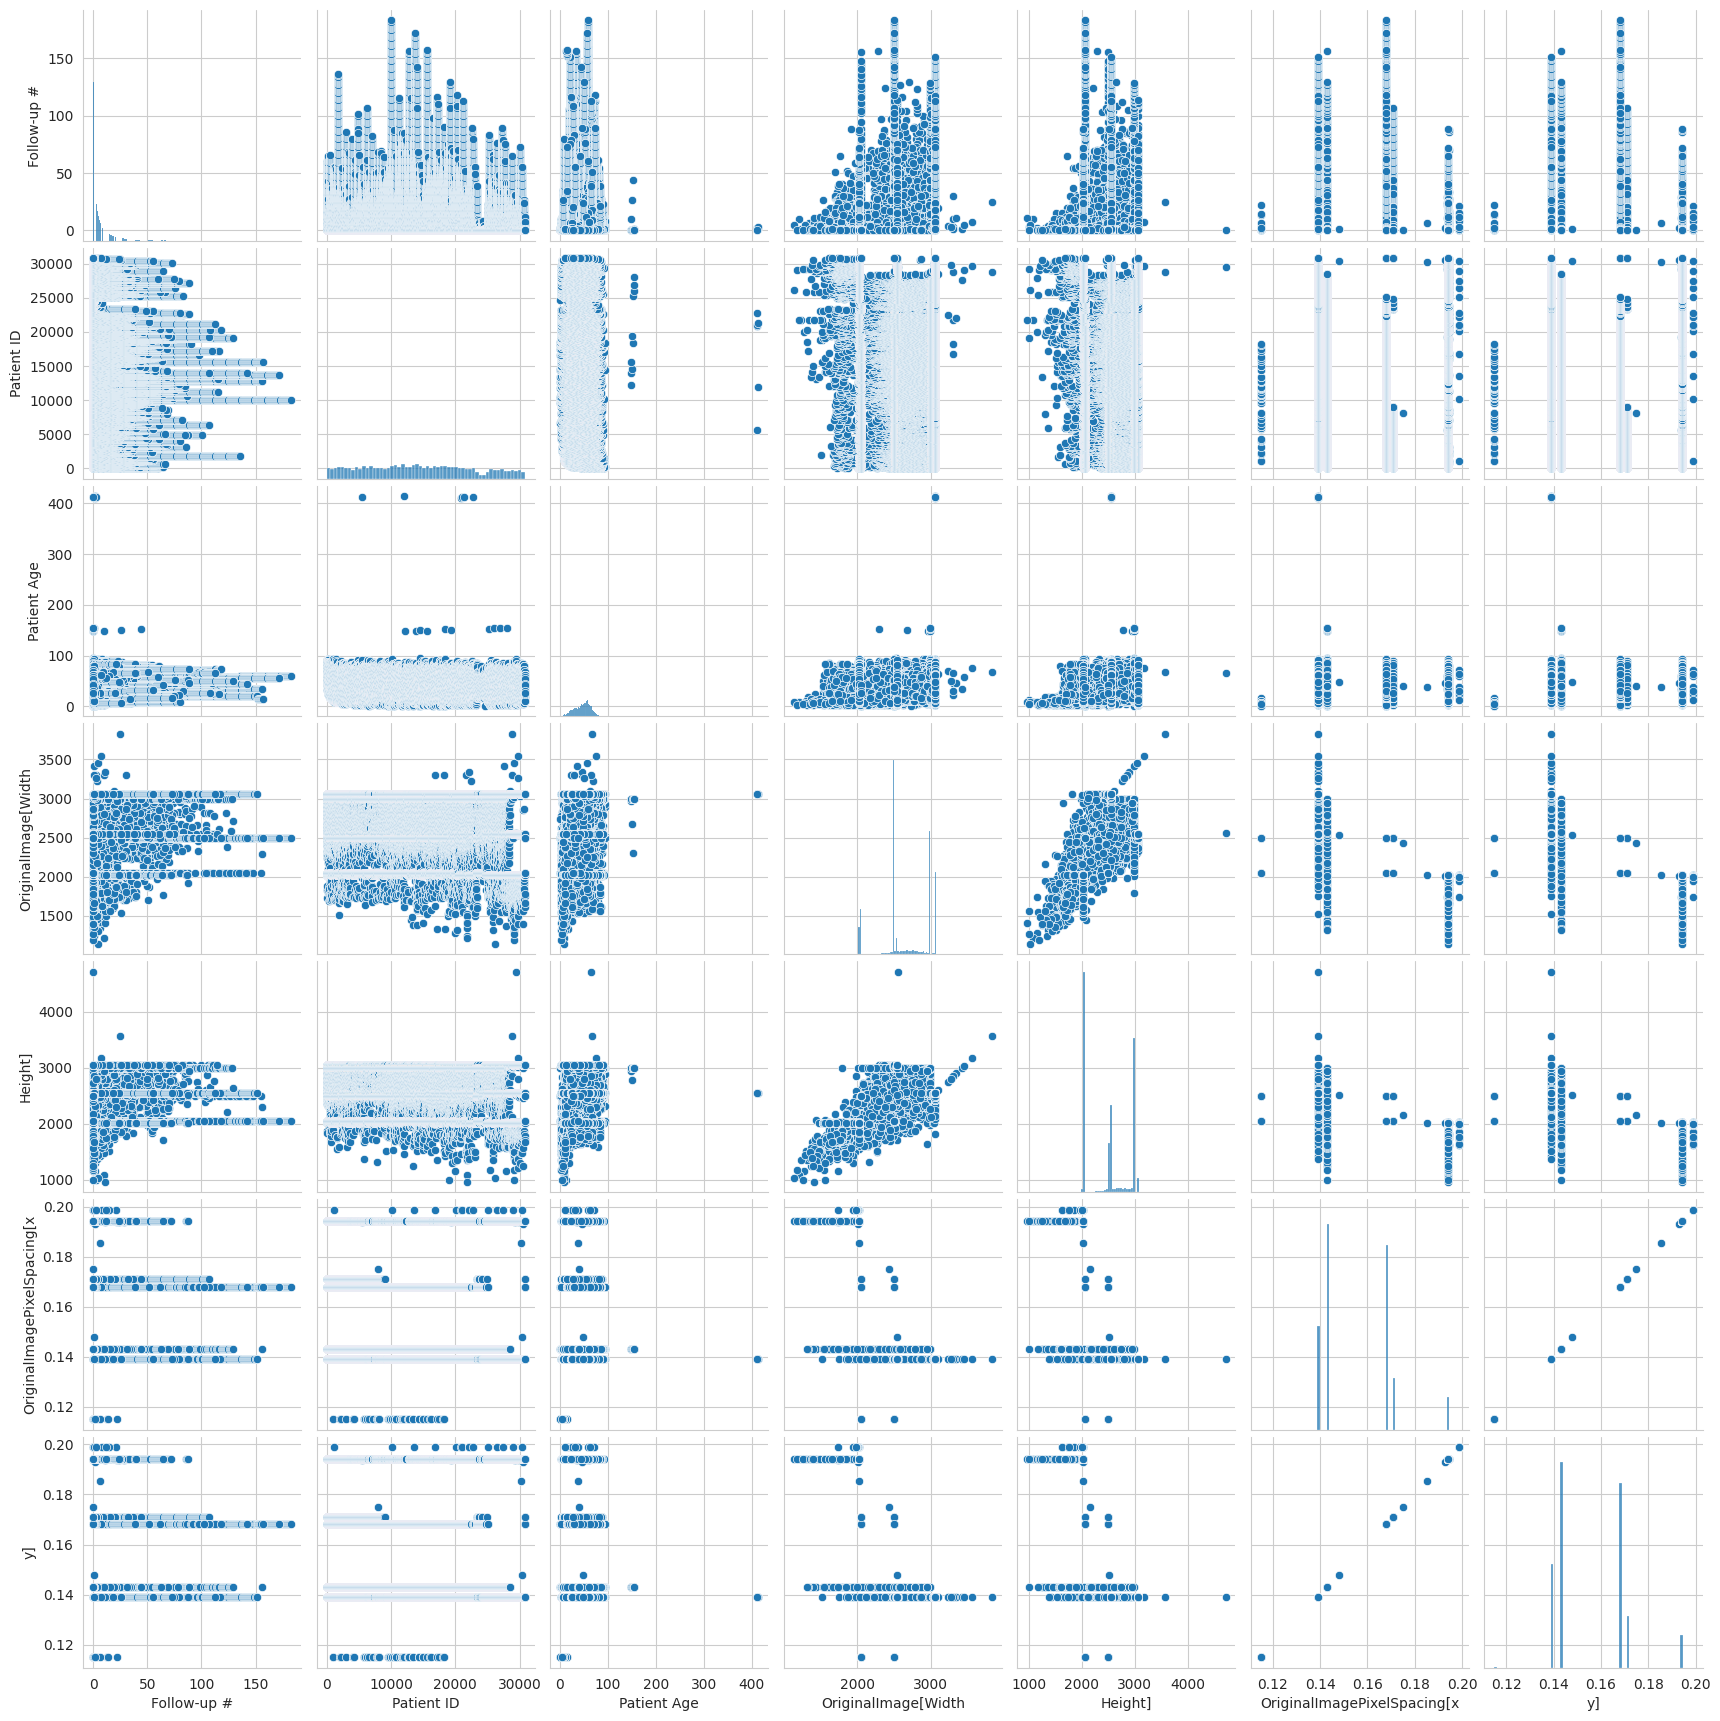

In [ ]:
# Visualize the distribution of numerical features
sns.pairplot(df_patient)
plt.show()

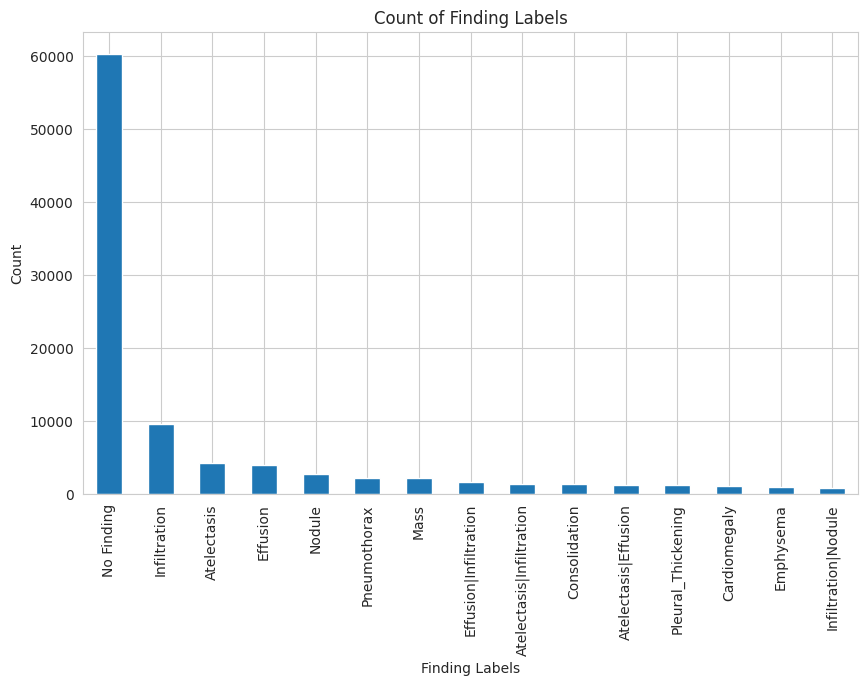

In [ ]:
#Visualize the dataset based on finding labels/diseases
label_counts = df_patient['Finding Labels'].value_counts()[:15]
# Plot the bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Count of Finding Labels')
plt.xlabel('Finding Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

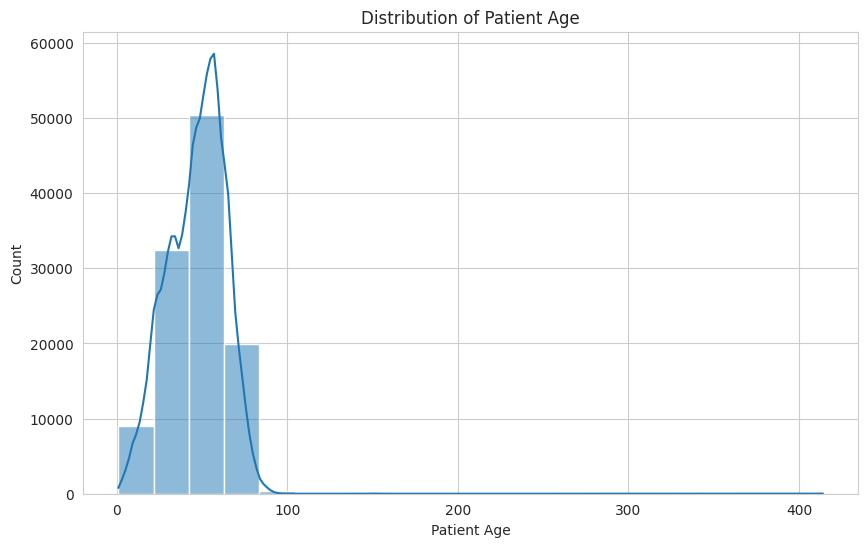

In [ ]:
# Patient Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_patient, x='Patient Age', bins=20, kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

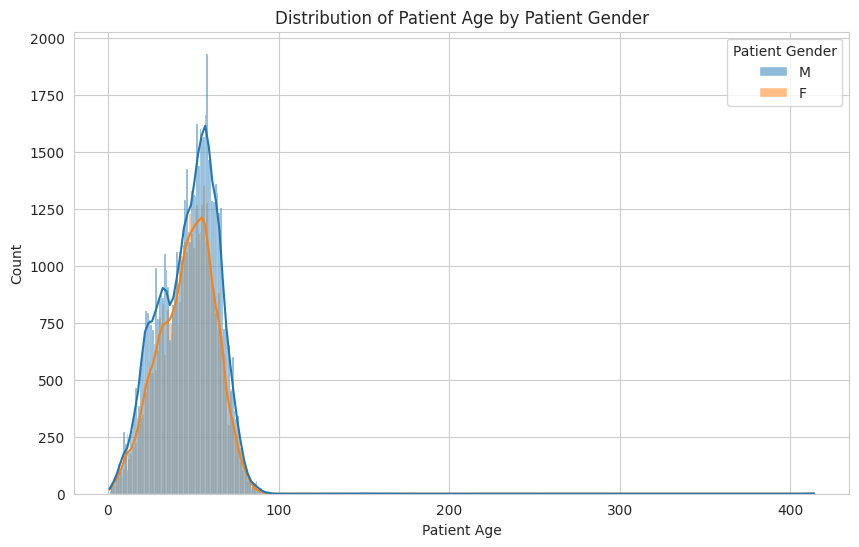

In [ ]:
#Distribution of Patient Age by Patient Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_patient, x='Patient Age', hue='Patient Gender', kde=True)
plt.title('Distribution of Patient Age by Patient Gender')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

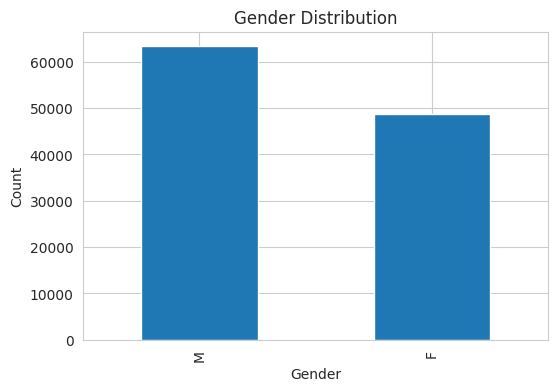

In [ ]:
# Gender Distribution
plt.figure(figsize=(6, 4))
df_patient['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

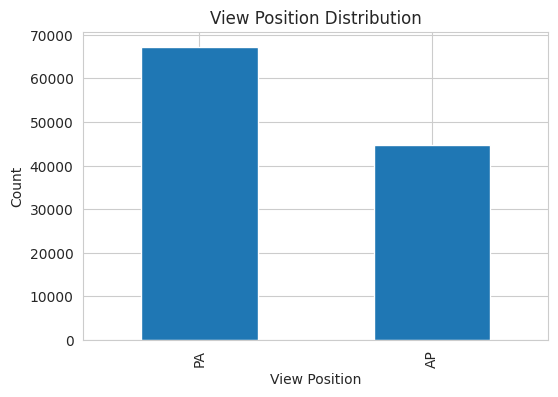

In [ ]:
# View Position Distribution
plt.figure(figsize=(6, 4))
df_patient['View Position'].value_counts().plot(kind='bar')
plt.title('View Position Distribution')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()


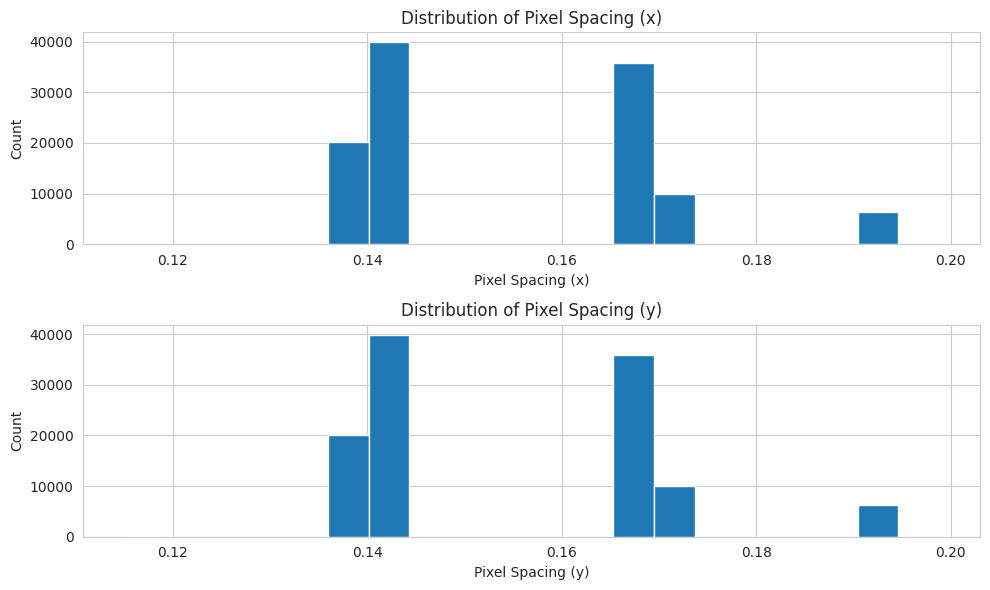

In [ ]:
# Pixel Spacing Distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
df_patient['OriginalImagePixelSpacing[x'].hist(bins=20)
plt.title('Distribution of Pixel Spacing (x)')
plt.xlabel('Pixel Spacing (x)')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
df_patient['y]'].hist(bins=20)
plt.title('Distribution of Pixel Spacing (y)')
plt.xlabel('Pixel Spacing (y)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

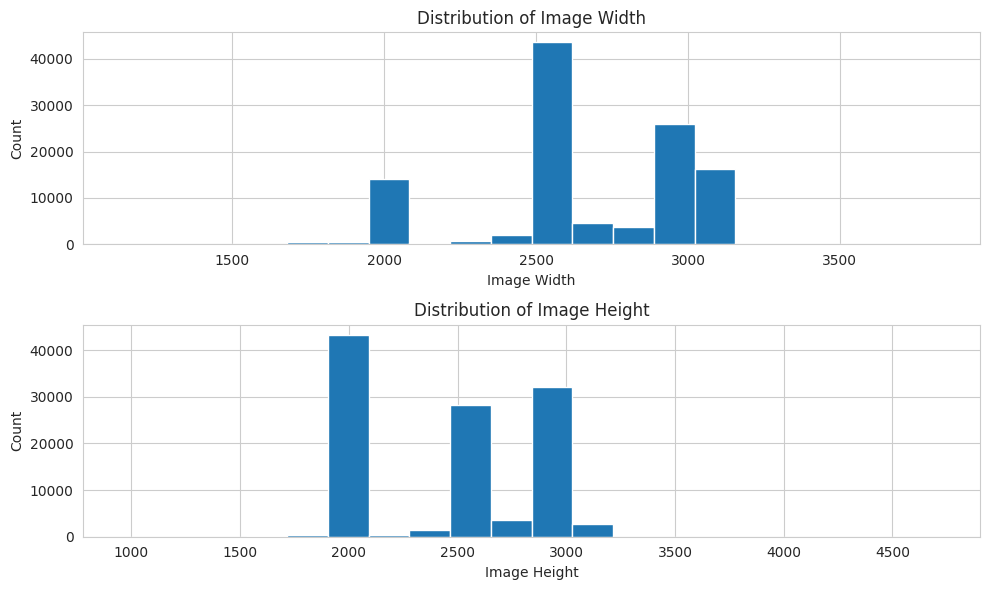

In [ ]:
# Image Dimensions Distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
df_patient['OriginalImage[Width'].hist(bins=20)
plt.title('Distribution of Image Width')
plt.xlabel('Image Width')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
df_patient['Height]'].hist(bins=20)
plt.title('Distribution of Image Height')
plt.xlabel('Image Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# reading the lung segmentation dataset
df_segmentation = pd.read_csv(file_path_seg, usecols=['Image Index','Finding Label','Bbox [x','y','w','h]'])
df_segmentation.head()

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


**Data Pre-processing**

Data Pre-processing for disease classification

In [ ]:
# remove rows which have greater than 100 as age
total = len(df_patient)
print('No. of rows before removing rows having age >100 : ',len(df_patient))
df_patient = df_patient[df_patient['Patient Age']<100]
print('No. of rows after removing rows having age >100 : ',len(df_patient))
print('No. of datapoints having age > 100 : ',total-len(df_patient))

No. of rows before removing rows having age >100 :  112104
No. of rows after removing rows having age >100 :  112104
No. of datapoints having age > 100 :  0


In [ ]:
# remove rows which do not have a gender(M/F) associated with it
total = len(df_patient)
print('No. of rows before cleaning gender column : ',len(df_patient))
df_patient = df_patient[df_patient['Patient Gender'].isin(['M', 'F'])]
print('No. of rows after cleansing gender column : ',len(df_patient))
print('No. of datapoints which do not have a gender associated wih it : ',total-len(df_patient))

No. of rows before cleaning gender column :  112104
No. of rows after cleansing gender column :  112104
No. of datapoints which do not have a gender associated wih it :  0


Data pre-processing for lung segmentation

In [ ]:
# Define paths to datasets
train_dataset_path = "chest-xray-masks-and-labels/Lung Segmentation/CXR_png"
mask_directory = "chest-xray-masks-and-labels/Lung Segmentation/masks"
test_dataset_path = "chest-xray-masks-and-labels/Lung Segmentation/test"

In [ ]:
# Function to load and preprocess image and mask
def load_data(image_path, mask_path, img_size=(256, 256)):
    image = load_img(image_path, color_mode="grayscale", target_size=img_size)
    mask = load_img(mask_path, color_mode="grayscale", target_size=img_size)

    # Convert images to arrays
    image_array = img_to_array(image) / 255.0  # Normalize pixel values
    mask_array = img_to_array(mask) / 255.0

    return image_array, mask_array

In [ ]:
# Function to perform data augmentation
def augment_data(image_array, mask_array):
    augmentation = Compose(
        [
            HorizontalFlip(p=0.5),
            VerticalFlip(p=0.5),
            RandomRotate90(p=0.5),
            ShiftScaleRotate(p=0.5),
            RandomBrightnessContrast(p=0.5),
        ]
    )

    augmented = augmentation(image=image_array, mask=mask_array)
    return augmented["image"], augmented["mask"]

In [ ]:
# Load and preprocess training data
X_train = []
y_train = []

for image_name in os.listdir(train_dataset_path):
    if image_name.endswith(".png"):
        image_path = os.path.join(train_dataset_path, image_name)
        mask_name = image_name.replace(".png", "_mask.png")
        mask_path = os.path.join(mask_directory, mask_name)  # Corrected mask path

        #print("Image Path:", image_path)
        #print("Mask Path:", mask_path)
        if os.path.exists(image_path) and os.path.exists(mask_path):
            image_array, mask_array = load_data(image_path, mask_path)
            X_train.append(image_array)
            y_train.append(mask_array)

          # Augment data
            augmented_image, augmented_mask = augment_data(image_array, mask_array)
            X_train.append(augmented_image)
            y_train.append(augmented_mask)
        #else:
            #print("Image or mask file not found.")

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)

(922, 256, 256, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the remaining data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)
print("Training masks shape:", y_train.shape)
print("Validation masks shape:", y_val.shape)
print("Test masks shape:", y_test.shape)

Training data shape: (530, 256, 256, 1)
Validation data shape: (148, 256, 256, 1)
Test data shape: (59, 256, 256, 1)
Training masks shape: (530, 256, 256, 1)
Validation masks shape: (148, 256, 256, 1)
Test masks shape: (59, 256, 256, 1)


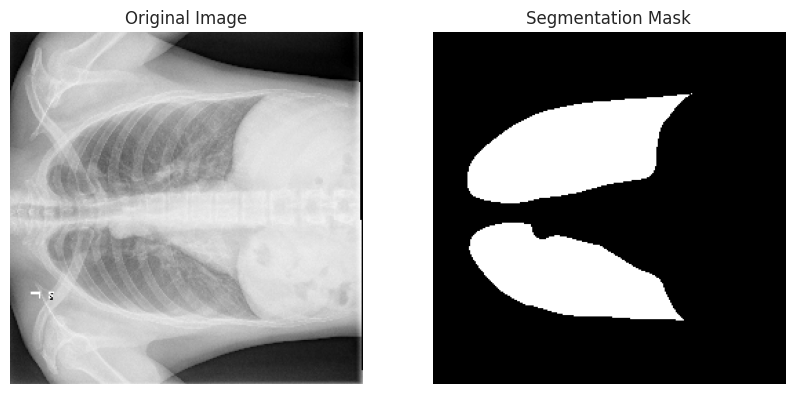

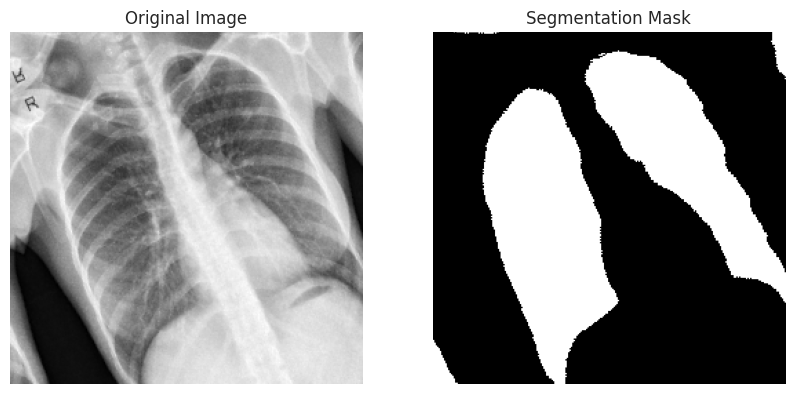

In [ ]:
# Function to display original image and its segmentation mask
def display_image_with_mask(image, mask):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')
    plt.show()

# Display original image and its segmentation mask for first two images
for i in range(2):
    display_image_with_mask(X_train[i], y_train[i])

Unet Modeling for lung segmentation

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from kerastuner import HyperModel, RandomSearch
import tensorflow as tf
from keras_tuner import Objective
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model

In [ ]:
def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3, padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3, padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, 3, padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, 3, padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Middle
    conv5 = Conv2D(1024, 3, padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, 3, padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)

    # Decoder
    up1 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    up1 = concatenate([up1, conv4], axis=3)
    conv6 = Conv2D(512, 3, padding='same')(up1)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, 3, padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation('relu')(conv6)

    up2 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up2 = concatenate([up2, conv3], axis=3)
    conv7 = Conv2D(256, 3, padding='same')(up2)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, 3, padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation('relu')(conv7)

    up3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up3 = concatenate([up3, conv2], axis=3)
    conv8 = Conv2D(128, 3, padding='same')(up3)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, 3, padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation('relu')(conv8)

    up4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up4 = concatenate([up4, conv1], axis=3)
    conv9 = Conv2D(64, 3, padding='same')(up4)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, 3, padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation('relu')(conv9)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_66 (Conv2D)          (None, 256, 256, 64)         640       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_60 (Ba  (None, 256, 256, 64)         256       ['conv2d_66[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_60 (Activation)  (None, 256, 256, 64)         0         ['batch_normalization_60

In [ ]:
# Function to decay the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
# Prepare model for training
input_shape = X_train[0].shape
model = unet(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[MeanIoU(num_classes=2)])

In [ ]:
# Train the model
callbacks = [LearningRateScheduler(scheduler)]
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)

Epoch 1/100
47/47 [==============================] - 28s 272ms/step - loss: 0.2485 - mean_io_u_6: 0.3736 - val_loss: 34.2086 - val_mean_io_u_6: 0.3396
Epoch 2/100
47/47 [==============================] - 7s 156ms/step - loss: 0.1541 - mean_io_u_6: 0.3736 - val_loss: 0.9113 - val_mean_io_u_6: 0.3719
Epoch 3/100
47/47 [==============================] - 8s 162ms/step - loss: 0.1240 - mean_io_u_6: 0.3736 - val_loss: 2.4757 - val_mean_io_u_6: 0.3731
Epoch 4/100
47/47 [==============================] - 7s 159ms/step - loss: 0.1033 - mean_io_u_6: 0.3736 - val_loss: 1.1092 - val_mean_io_u_6: 0.3715
Epoch 5/100
47/47 [==============================] - 8s 171ms/step - loss: 0.0968 - mean_io_u_6: 0.3736 - val_loss: 0.7344 - val_mean_io_u_6: 0.3715
Epoch 6/100
47/47 [==============================] - 8s 164ms/step - loss: 0.0930 - mean_io_u_6: 0.3736 - val_loss: 0.9609 - val_mean_io_u_6: 0.3715
Epoch 7/100
47/47 [==============================] - 8s 176ms/step - loss: 0.0786 - mean_io_u_6: 0.3736 

In [ ]:
# HyperModel subclass for U-Net
class UnetHyperModel(HyperModel):
    def build(self, hp):

        inputs = Input(shape=(256, 256, 1))

        # Encoder
        conv1 = Conv2D(64, 3, padding='same')(inputs)
        conv1 = BatchNormalization()(conv1)
        conv1 = Activation('relu')(conv1)
        conv1 = Conv2D(64, 3, padding='same')(conv1)
        conv1 = BatchNormalization()(conv1)
        conv1 = Activation('relu')(conv1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv2 = Conv2D(128, 3, padding='same')(pool1)
        conv2 = BatchNormalization()(conv2)
        conv2 = Activation('relu')(conv2)
        conv2 = Conv2D(128, 3, padding='same')(conv2)
        conv2 = BatchNormalization()(conv2)
        conv2 = Activation('relu')(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

        conv3 = Conv2D(256, 3, padding='same')(pool2)
        conv3 = BatchNormalization()(conv3)
        conv3 = Activation('relu')(conv3)
        conv3 = Conv2D(256, 3, padding='same')(conv3)
        conv3 = BatchNormalization()(conv3)
        conv3 = Activation('relu')(conv3)
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

        conv4 = Conv2D(512, 3, padding='same')(pool3)
        conv4 = BatchNormalization()(conv4)
        conv4 = Activation('relu')(conv4)
        conv4 = Conv2D(512, 3, padding='same')(conv4)
        conv4 = BatchNormalization()(conv4)
        conv4 = Activation('relu')(conv4)
        pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

        # Middle
        conv5 = Conv2D(1024, 3, padding='same')(pool4)
        conv5 = BatchNormalization()(conv5)
        conv5 = Activation('relu')(conv5)
        conv5 = Conv2D(1024, 3, padding='same')(conv5)
        conv5 = BatchNormalization()(conv5)
        conv5 = Activation('relu')(conv5)

        # Decoder
        up1 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
        up1 = concatenate([up1, conv4], axis=3)
        conv6 = Conv2D(512, 3, padding='same')(up1)
        conv6 = BatchNormalization()(conv6)
        conv6 = Activation('relu')(conv6)
        conv6 = Conv2D(512, 3, padding='same')(conv6)
        conv6 = BatchNormalization()(conv6)
        conv6 = Activation('relu')(conv6)

        up2 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
        up2 = concatenate([up2, conv3], axis=3)
        conv7 = Conv2D(256, 3, padding='same')(up2)
        conv7 = BatchNormalization()(conv7)
        conv7 = Activation('relu')(conv7)
        conv7 = Conv2D(256, 3, padding='same')(conv7)
        conv7 = BatchNormalization()(conv7)
        conv7 = Activation('relu')(conv7)

        up3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
        up3 = concatenate([up3, conv2], axis=3)
        conv8 = Conv2D(128, 3, padding='same')(up3)
        conv8 = BatchNormalization()(conv8)
        conv8 = Activation('relu')(conv8)
        conv8 = Conv2D(128, 3, padding='same')(conv8)
        conv8 = BatchNormalization()(conv8)
        conv8 = Activation('relu')(conv8)

        up4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
        up4 = concatenate([up4, conv1], axis=3)
        conv9 = Conv2D(64, 3, padding='same')(up4)
        conv9 = BatchNormalization()(conv9)
        conv9 = Activation('relu')(conv9)
        conv9 = Conv2D(64, 3, padding='same')(conv9)
        conv9 = BatchNormalization()(conv9)
        conv9 = Activation('relu')(conv9)

        outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.0001, 0.00001])),
                      loss='binary_crossentropy', metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])
        return model

# Random Search Tuning
hypermodel = UnetHyperModel()
objective = Objective("val_mean_io_u", direction="max")
# Overwriting a new tuner instance
tuner_1 = RandomSearch(
    hypermodel,
    objective=objective,
    max_trials=5,
    executions_per_trial=3,
    directory='./untitled_project',  # Use the same directory
    project_name='tuner0',            # Use the same project name
    overwrite=True                    # Overwrite any existing data
)
# Start the search again
tuner_1.search(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Get the optimal hyperparameters
best_hyperparameters = tuner_1.get_best_hyperparameters(1)[0]

Trial 3 Complete [00h 07m 29s]
val_mean_io_u: 0.37151744961738586

Best val_mean_io_u So Far: 0.429459551970164
Total elapsed time: 00h 22m 53s


In [ ]:
# Define input shape
input_shape = (256, 256, 3)  # Define your input shape here

# Create an instance of the UnetHyperModel
hypermodel = UnetHyperModel()

# Build the model with the best hyperparameters
model = hypermodel.build(best_hyperparameters)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Get the summary of the model architecture
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 256, 256, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 256, 256, 64)         0         ['batch_normalization_18

In [ ]:
epochs = 100
batch_size = 32

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

Epoch 1/100
24/24 [==============================] - 13s 311ms/step - loss: 0.3830 - accuracy: 0.8429 - val_loss: 20.2575 - val_accuracy: 0.6311
Epoch 2/100
24/24 [==============================] - 7s 296ms/step - loss: 0.2471 - accuracy: 0.9103 - val_loss: 263.5290 - val_accuracy: 0.7435
Epoch 3/100
24/24 [==============================] - 7s 289ms/step - loss: 0.1601 - accuracy: 0.9457 - val_loss: 7.4671 - val_accuracy: 0.7430
Epoch 4/100
24/24 [==============================] - 8s 320ms/step - loss: 0.1548 - accuracy: 0.9459 - val_loss: 1.2662 - val_accuracy: 0.7430
Epoch 5/100
24/24 [==============================] - 7s 303ms/step - loss: 0.1212 - accuracy: 0.9589 - val_loss: 1.4405 - val_accuracy: 0.6539
Epoch 6/100
24/24 [==============================] - 7s 294ms/step - loss: 0.1183 - accuracy: 0.9587 - val_loss: 2.4827 - val_accuracy: 0.7430
Epoch 7/100
24/24 [==============================] - 8s 332ms/step - loss: 0.1274 - accuracy: 0.9542 - val_loss: 1.5284 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import f1_score

# Make predictions on the validation data
y_pred_val = model.predict(X_val)

# Convert predictions and ground truth to binary values
y_pred_val_binary = (y_pred_val > 0.5).astype(int)
y_val_binary = (y_val > 0.5).astype(int)

# Calculate F1 score
f1_val = f1_score(y_val_binary.flatten(), y_pred_val_binary.flatten())

print("Validation F1 Score:", f1_val)

6/6 [==============================] - 1s 151ms/step
Validation F1 Score: 0.9556301774750859


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.metrics import MeanIoU

# Assuming y_test contains the ground truth masks
# Predict segmentation masks for test images
y_pred = model.predict(X_test)

# Flatten the ground truth and predicted masks
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Compute accuracy
accuracy = accuracy_score(y_test_flat, y_pred_flat.round())

# Compute F1 score
f1 = f1_score(y_test_flat, y_pred_flat.round())

# Compute mean IoU
iou = MeanIoU(num_classes=2)
iou.update_state(y_test_flat, y_pred_flat.round())
mean_iou = iou.result().numpy()

print("Test Accuracy:", accuracy)
print("F1 Score:", f1)
print("Mean IoU:", mean_iou)

2/2 [==============================] - 6s 6s/step
Test Accuracy: 0.9844618975105932
F1 Score: 0.9694235670605096
Mean IoU: 0.9600226


In [ ]:
# Function to preprocess test images
def preprocess_test_images(test_dataset_path):
    test_images = []
    for image_name in os.listdir(test_dataset_path):
        if image_name.endswith(".png"):
            image_path = os.path.join(test_dataset_path, image_name)
            # Load and preprocess test image
            image = load_img(image_path, color_mode="grayscale", target_size=(256, 256))
            image_array = img_to_array(image) / 255.0
            test_images.append(image_array)
    return np.array(test_images)

In [ ]:
# Preprocess test images
X_test = preprocess_test_images(test_dataset_path)

# Predict segmentation masks for test images
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 12ms/step


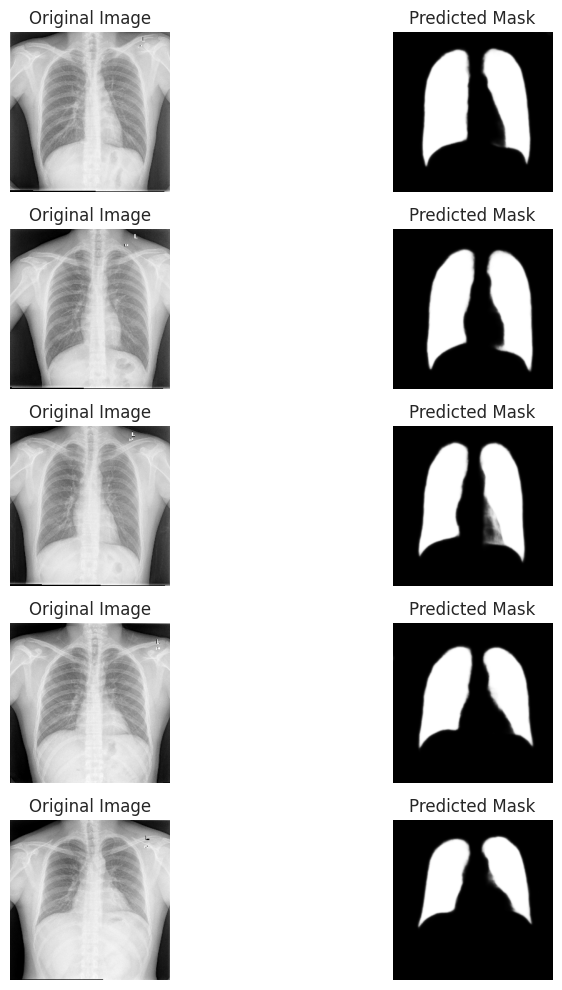

In [ ]:
# Plot original images and predicted masks side by side
import matplotlib.pyplot as plt

n = min(len(X_test), 5)  # Plot up to 5 images
fig, axes = plt.subplots(n, 2, figsize=(10, 10))
for i in range(n):
    # Original image
    axes[i, 0].imshow(X_test[i].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    # Predicted mask
    y_pred = model.predict(X_test[i:i+1])
    axes[i, 1].imshow(y_pred[0].squeeze(), cmap='gray')
    axes[i, 1].set_title('Predicted Mask')
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model.save("unet_model.h5")